# Memoria Práctica 2

## Apartado1

In [3]:
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
import time


datasets = ["example1.data","example2.data","example3.data","example4.data","wdbc.data"]
vecinos = [1,3,5,7,9,11]
n_particiones = 5
for k in vecinos:
    print("#############################################################################################################")
    print("########################################  K= ",k,"#############################################################")
    print("#############################################################################################################")
    for i in range(len(datasets)):
        start_time_train=0
        start_time_test=0
        dataset = Datos(datasets[i])

        particiones = ValidacionSimple(n_particiones,0.5,dataset).creaParticiones(dataset.datos)   
        errores = np.empty(n_particiones)
        for j in range(n_particiones):
            datosTrain = dataset.extraeDatos(particiones[j].indicesTrain)
            datosTest = dataset.extraeDatos(particiones[j].indicesTest)
            cKNN =  ClasificadorVecinosProximos()
            aux = time.time()
            cKNN.entrenamiento(datosTrain,dataset.nominalAtributos,dataset.diccionarios)
            start_time_train = start_time_train + time.time() - aux

            aux2 = time.time()
            res = cKNN.clasifica(datosTest[:,0:-1],dataset.nominalAtributos,dataset.diccionarios,False,k)
            start_time_test = start_time_test + time.time() - aux2

            error = Clasificador.error(datosTest,res)
            errores[j] = error
        print("---Tiempo de entrenamiento del modelo",datasets[i],"con",k,"vecinos:",start_time_train," segundos ---")
        print("---Tiempo de clasificacion del modelo",datasets[i],"con",k,"vecinos:",start_time_test," segundos ---")
        print("Tasa de error:",np.mean(errores))



#############################################################################################################
########################################  K=  1 #############################################################
#############################################################################################################
---Tiempo de entrenamiento del modelo example1.data con 1 vecinos: 0.0008881092071533203  segundos ---
---Tiempo de clasificacion del modelo example1.data con 1 vecinos: 5.574480295181274  segundos ---
Tasa de error: 0.18391959798994978
---Tiempo de entrenamiento del modelo example2.data con 1 vecinos: 0.0009086132049560547  segundos ---
---Tiempo de clasificacion del modelo example2.data con 1 vecinos: 5.442800521850586  segundos ---
Tasa de error: 0.0
---Tiempo de entrenamiento del modelo example3.data con 1 vecinos: 0.0010330677032470703  segundos ---
---Tiempo de clasificacion del modelo example3.data con 1 vecinos: 5.2376697063446045  segundos ---
Tasa de e

In [3]:
# from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
import time


datasets = ["example1.data","example2.data","example3.data","example4.data","wdbc.data"]
vecinos = [1,3,5,7,9,11]
n_particiones = 5
for k in vecinos:
    print("#############################################################################################################")
    print("########################################  K= ",k,"#############################################################")
    print("#############################################################################################################")
    for i in range(len(datasets)):
        start_time_train=0
        start_time_test=0
        dataset = Datos(datasets[i])

        particiones = ValidacionSimple(n_particiones,0.5,dataset).creaParticiones(dataset.datos)   
        errores = np.empty(n_particiones)
        for j in range(n_particiones):
            datosTrain = dataset.extraeDatos(particiones[j].indicesTrain)
            datosTest = dataset.extraeDatos(particiones[j].indicesTest)
            cKNN =  ClasificadorVecinosProximos()
            aux = time.time()
            cKNN.entrenamiento(datosTrain,dataset.nominalAtributos,dataset.diccionarios,False)
            start_time_train = start_time_train + time.time() - aux

            aux2 = time.time()
            res = cKNN.clasifica(datosTest[:,0:-1],dataset.nominalAtributos,dataset.diccionarios,False,k,False)
            start_time_test = start_time_test + time.time() - aux2

            error = Clasificador.error(datosTest,res)
            errores[j] = error
        print("---Tiempo de entrenamiento del modelo",datasets[i],"con",k,"vecinos:",start_time_train," segundos ---")
        print("---Tiempo de clasificacion del modelo",datasets[i],"con",k,"vecinos:",start_time_test," segundos ---")
        print("Tasa de error:",np.mean(errores))

#############################################################################################################
########################################  K=  1 #############################################################
#############################################################################################################
---Tiempo de entrenamiento del modelo example1.data con 1 vecinos: 7.557868957519531e-05  segundos ---
---Tiempo de clasificacion de la particion example1.data con 1 vecinos: 4.70957350730896  segundos ---
Tasa de error: 0.16683417085427138
---Tiempo de entrenamiento del modelo example2.data con 1 vecinos: 0.00010251998901367188  segundos ---
---Tiempo de clasificacion de la particion example2.data con 1 vecinos: 5.153411388397217  segundos ---
Tasa de error: 0.0
---Tiempo de entrenamiento del modelo example3.data con 1 vecinos: 9.107589721679688e-05  segundos ---
---Tiempo de clasificacion de la particion example3.data con 1 vecinos: 5.341871500015259  segundos

### Conclusiones:

Como podemos ver a la salida de los dos códigos anteriores, el aumento del número de vecinos a observar no mejora significativamente nuestra tasa de error, sin embargo,lo que si que produce beneficia a la correcta clasificación en nuestros conjuntos de datos es la Normalización en los archivos example4.data y wdbc.data esto puede deberse a que los atributos de estos archivos están representados en distintos órdenes de magnitud. También cabe mencionar el reducido coste de entrenamiento incluso en el caso en el que normalizamos los datos que es mucho menor que el coste computacional de clasificación. Por ell el clasificador de vecinos próximos será adecuado cuando dispongamos de un tiempo de etrenamiento limitado y no nos preocupe en demasía que tarde en clasificar un dato. A continuación mostramos gráficamente las fronteras que se corresponden bastante a las tasas de error 

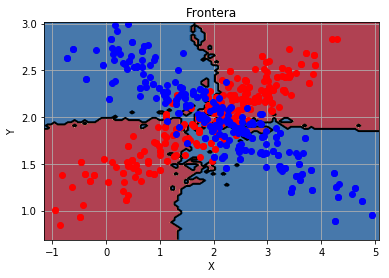

5e-324


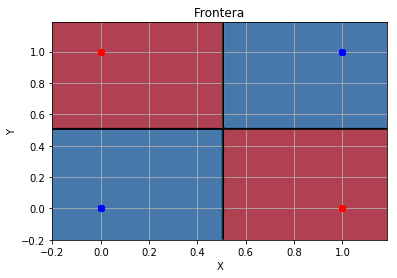

5e-324


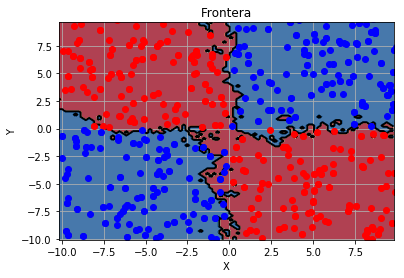

5e-324


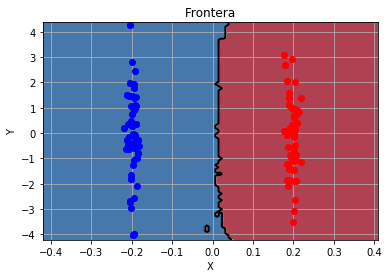

5e-324


In [20]:
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
from plotModel import plotModel 
import matplotlib.pyplot as plt 

datasets = ["example1.data","example2.data","example3.data","example4.data"]
n_particiones = 1
for i in range(len(datasets)):
    dataset = Datos(datasets[i])

    particiones = ValidacionSimple(n_particiones,0.5,dataset).creaParticiones(dataset.datos)   
    errores = np.empty(n_particiones)
    for j in range(n_particiones):
        datosTrain = dataset.extraeDatos(particiones[j].indicesTrain)
        datosTest = dataset.extraeDatos(particiones[j].indicesTest)
        cKNN =  ClasificadorVecinosProximos()
        cKNN.entrenamiento(datosTrain,dataset.nominalAtributos,dataset.diccionarios)
        #res = cKNN.clasifica(datosTest[:,0:-1],dataset.nominalAtributos,dataset.diccionarios)

        #error = Clasificador.error(datosTest,res)
        #errores[j] = error
        #"""
        plt.figure()
        plotModel(dataset.datos[particiones[j].indicesTrain,0],dataset.datos[particiones[j].indicesTrain,1],
                dataset.datos[particiones[j].indicesTrain,-1] !=0, cKNN,"Frontera",dataset.diccionarios)
        plt.plot(dataset.datos[dataset.datos[:,-1]==0,0],  
         dataset.datos[dataset.datos[:,-1]==0,1],'ro')
        plt.plot(dataset.datos[dataset.datos[:,-1]==1,0],  
         dataset.datos[dataset.datos[:,-1]==1,1],'bo')
        plt.show()
        #"""
    print(np.mean(errores))




## Apartado 2 

In [10]:
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
import time


datasets = ["example1.data","example2.data","example3.data","example4.data","wdbc.data"]
nus = [0.2,1,10,50]
nepocas = [4,50, 100,200]
n_particiones = 5
for nu in nus:
    for nepoca in nepocas:
        print("#############################################################################################################")
        print("########################################  nu= ",nu,"#############################################################")
        print("#############################################################################################################")
        for i in range(len(datasets)):
            start_time_train=0
            start_time_test=0
            dataset = Datos(datasets[i])

            particiones = ValidacionSimple(n_particiones,0.5,dataset).creaParticiones(dataset.datos)   
            errores = np.empty(n_particiones)
            for j in range(n_particiones):
                datosTrain = dataset.extraeDatos(particiones[j].indicesTrain)
                datosTest = dataset.extraeDatos(particiones[j].indicesTest)
                cRL =  ClasificadorRegresionLineal()
                aux = time.time()
                cRL.entrenamiento(datosTrain,dataset.nominalAtributos,dataset.diccionarios,nu,nepoca)
                start_time_train = start_time_train + time.time() - aux

                aux2 = time.time()
                res = cRL.clasifica(datosTest[:,0:-1],dataset.nominalAtributos,dataset.diccionarios)
                start_time_test = start_time_test + time.time() - aux2

                error = Clasificador.error(datosTest,res)
                errores[j] = error
            print("---Tiempo de entrenamiento del modelo",datasets[i],"con nu =",nu,"y nepocas =",nepoca,":",start_time_train," segundos ---")
            print("---Tiempo de clasificacion del modelo",datasets[i],"con nu =",nu,"y nepocas =",nepoca,":",start_time_test," segundos ---")
            print("Tasa de error:",np.mean(errores))


#############################################################################################################
########################################  nu=  0.2 #############################################################
#############################################################################################################
---Tiempo de entrenamiento del modelo example1.data con nu = 0.2 y nepocas = 4 : 0.04968833923339844  segundos ---
---Tiempo de clasificacion del modelo example1.data con nu = 0.2 y nepocas = 4 : 0.009831666946411133  segundos ---
Tasa de error: 0.5306532663316583
---Tiempo de entrenamiento del modelo example2.data con nu = 0.2 y nepocas = 4 : 0.04790830612182617  segundos ---
---Tiempo de clasificacion del modelo example2.data con nu = 0.2 y nepocas = 4 : 0.016236543655395508  segundos ---
Tasa de error: 0.45929648241206034
---Tiempo de entrenamiento del modelo example3.data con nu = 0.2 y nepocas = 4 : 0.03873109817504883  segundos ---
---Tiempo de clasific

/home/jovyan/Clasificador.py:290: RuntimeWarning: overflow encountered in exp
  return 1./(1+ np.exp(-sum(self.omega*x)))


---Tiempo de entrenamiento del modelo example1.data con nu = 10 y nepocas = 50 : 0.5205080509185791  segundos ---
---Tiempo de clasificacion del modelo example1.data con nu = 10 y nepocas = 50 : 0.007725954055786133  segundos ---
Tasa de error: 0.493467336683417
---Tiempo de entrenamiento del modelo example2.data con nu = 10 y nepocas = 50 : 0.5434134006500244  segundos ---
---Tiempo de clasificacion del modelo example2.data con nu = 10 y nepocas = 50 : 0.008285760879516602  segundos ---
Tasa de error: 0.23819095477386934
---Tiempo de entrenamiento del modelo example3.data con nu = 10 y nepocas = 50 : 0.7522296905517578  segundos ---
---Tiempo de clasificacion del modelo example3.data con nu = 10 y nepocas = 50 : 0.008118152618408203  segundos ---
Tasa de error: 0.48542713567839185
---Tiempo de entrenamiento del modelo example4.data con nu = 10 y nepocas = 50 : 0.15394234657287598  segundos ---
---Tiempo de clasificacion del modelo example4.data con nu = 10 y nepocas = 50 : 0.002643346

In [11]:
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
import time


datasets = ["example1.data","example2.data","example3.data","example4.data","wdbc.data"]
nus = [0.2,1,10,50]
nepocas = [4,50, 100]
n_particiones = 5
for nu in nus:
    for nepoca in nepocas:
        print("#############################################################################################################")
        print("########################################  nu= ",nu,"#############################################################")
        print("#############################################################################################################")
        for i in range(len(datasets)):
            start_time_train=0
            start_time_test=0
            dataset = Datos(datasets[i])

            particiones = ValidacionSimple(n_particiones,0.5,dataset).creaParticiones(dataset.datos,False)   
            errores = np.empty(n_particiones)
            for j in range(n_particiones):
                datosTrain = dataset.extraeDatos(particiones[j].indicesTrain)
                datosTest = dataset.extraeDatos(particiones[j].indicesTest)
                cKNN =  ClasificadorRegresionLineal()
                aux = time.time()
                cKNN.entrenamiento(datosTrain,dataset.nominalAtributos,dataset.diccionarios,nu,nepoca,False)
                start_time_train = start_time_train + time.time() - aux

                aux2 = time.time()
                res = cKNN.clasifica(datosTest[:,0:-1],dataset.nominalAtributos,dataset.diccionarios)
                start_time_test = start_time_test + time.time() - aux

                error = Clasificador.error(datosTest,res)
                errores[j] = error
            print("---Tiempo de entrenamiento del modelo",datasets[i],"con nu =",nu,"y nepocas =",nepoca,":",start_time_train," segundos ---")
            print("---Tiempo de clasificacion del modelo",datasets[i],"con nu =",nu,"y nepocas =",nepoca,":",start_time_test," segundos ---")
            print("Tasa de error:",np.mean(errores))


#############################################################################################################
########################################  nu=  0.2 #############################################################
#############################################################################################################
---Tiempo de entrenamiento del modelo example1.data con nu = 0.2 y nepocas = 4 : 0.058469295501708984  segundos ---
---Tiempo de clasificacion del modelo example1.data con nu = 0.2 y nepocas = 4 : 0.06715869903564453  segundos ---
Tasa de error: 0.4683417085427136
---Tiempo de entrenamiento del modelo example2.data con nu = 0.2 y nepocas = 4 : 0.05803275108337402  segundos ---
---Tiempo de clasificacion del modelo example2.data con nu = 0.2 y nepocas = 4 : 0.06804227828979492  segundos ---
Tasa de error: 0.4673366834170854
---Tiempo de entrenamiento del modelo example3.data con nu = 0.2 y nepocas = 4 : 0.06161975860595703  segundos ---
---Tiempo de clasificac

/home/jovyan/Clasificador.py:290: RuntimeWarning: overflow encountered in exp
  return 1./(1+ np.exp(-sum(self.omega*x)))


---Tiempo de entrenamiento del modelo example1.data con nu = 0.2 y nepocas = 50 : 0.549231767654419  segundos ---
---Tiempo de clasificacion del modelo example1.data con nu = 0.2 y nepocas = 50 : 0.5566549301147461  segundos ---
Tasa de error: 0.44522613065326644
---Tiempo de entrenamiento del modelo example2.data con nu = 0.2 y nepocas = 50 : 0.5439720153808594  segundos ---
---Tiempo de clasificacion del modelo example2.data con nu = 0.2 y nepocas = 50 : 0.5516743659973145  segundos ---
Tasa de error: 0.4673366834170854
---Tiempo de entrenamiento del modelo example3.data con nu = 0.2 y nepocas = 50 : 0.5204613208770752  segundos ---
---Tiempo de clasificacion del modelo example3.data con nu = 0.2 y nepocas = 50 : 0.5281884670257568  segundos ---
Tasa de error: 0.4623115577889448
---Tiempo de entrenamiento del modelo example4.data con nu = 0.2 y nepocas = 50 : 0.1607375144958496  segundos ---
---Tiempo de clasificacion del modelo example4.data con nu = 0.2 y nepocas = 50 : 0.163486242

### Conclusiones:

Vemos que la regresión lineal es muy mala para los conjuntos de de datos example1.data,example2.data y example3.data lo cual nos lleva a pensa que usar un clasificador lineal no es adecuado para estos problemas, por otro lado en el archivo example4.data obtenemos una tasa de error de 0 y en wdbc.data varía bastante la tasa de error respecto a normalizar o no normalizar lo cual nos lleva a pensar que los datos estan representados en distintas escalas de magnitud. Para terminar, es relevante mencionar que en estos conjuntos de datos la regresión logística converge relativamente rápido y que es un tipo de clasificador con un alto coste de entrenamiento y bajo coste de clasificación de ejemplos. A continuación mostramos gráficamente las fronteras que se corresponden bastante a las tasas de error 

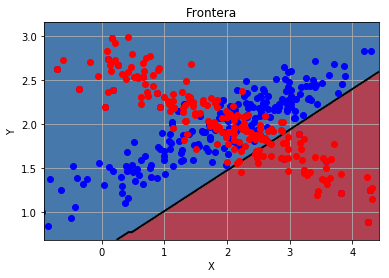

0.6629526462395543


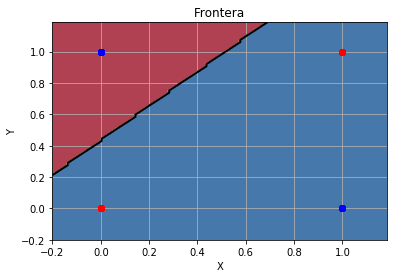

0.2618384401114206


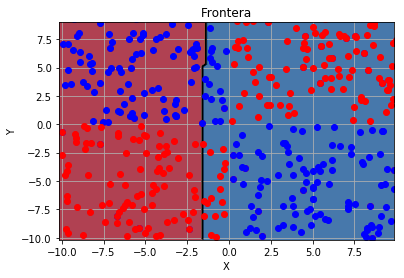

0.5153203342618384


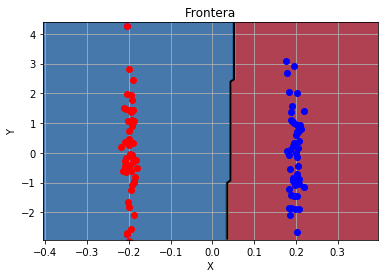

0.0


ValueError: operands could not be broadcast together with shapes (31,) (3,) 

<Figure size 432x288 with 0 Axes>

In [17]:
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
from plotModel import plotModel 
import matplotlib.pyplot as plt 

datasets = ["example1.data","example2.data","example3.data","example4.data"]
n_particiones = 1
for i in range(len(datasets)):
    dataset = Datos(datasets[i])

    particiones = ValidacionSimple(n_particiones,0.1,dataset).creaParticiones(dataset.datos)   
    errores = np.empty(n_particiones)
    for j in range(n_particiones):
        datosTrain = dataset.extraeDatos(particiones[j].indicesTrain)
        datosTest = dataset.extraeDatos(particiones[j].indicesTest)
        cRL =  ClasificadorRegresionLineal()
        cRL.entrenamiento(datosTrain,dataset.nominalAtributos,dataset.diccionarios,1,100)
        res = cRL.clasifica(datosTest[:,:-1],dataset.nominalAtributos,dataset.diccionarios)

        error = Clasificador.error(datosTest,res)
        errores[j] = error
        plt.figure()
        plotModel(dataset.datos[particiones[j].indicesTrain,0],dataset.datos[particiones[j].indicesTrain,1],
                dataset.datos[particiones[j].indicesTrain,-1] !=0, cRL,"Frontera",dataset.diccionarios)
        plt.plot(dataset.datos[dataset.datos[:,-1]==0,0],  
         dataset.datos[dataset.datos[:,-1]==0,1],'bo')
        plt.plot(dataset.datos[dataset.datos[:,-1]==1,0],  
         dataset.datos[dataset.datos[:,-1]==1,1],'ro')
        plt.show()
    print(np.mean(errores))




## Apartado 3

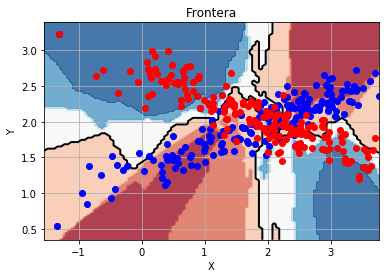

Error de scikit:
0.2200557103064067


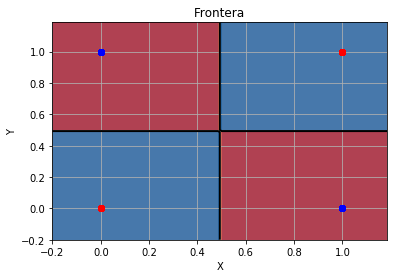

Error de scikit:
0.0


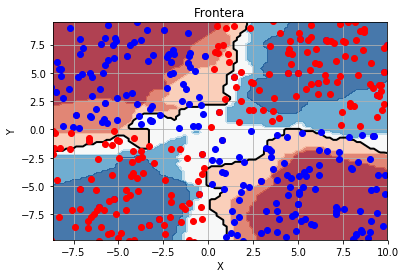

Error de scikit:
0.12256267409470752


/srv/conda/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


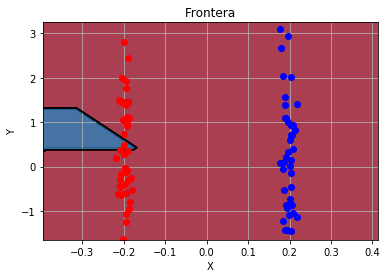

Error de scikit:
0.5280898876404494


In [13]:
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
from sklearn.neighbors import KNeighborsClassifier

datasets = ["example1.data","example2.data","example3.data","example4.data"]
n_particiones = 1
for i in range(len(datasets)):
    dataset = Datos(datasets[i])

    particiones = ValidacionSimple(n_particiones,0.1,dataset).creaParticiones(dataset.datos)   
    errores = np.empty(n_particiones)
    for j in range(n_particiones):
        datosTrain = dataset.extraeDatos(particiones[j].indicesTrain)
        datosTest = dataset.extraeDatos(particiones[j].indicesTest)

        neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2) #pesos uniformes, norma 2, 5 vecinos
        neigh.fit(datosTrain[:,:-1],datosTrain[:,-1])
        res = neigh.predict(datosTest[:,:-1])
        error = Clasificador.error(datosTest,res)
    plt.figure()
    plotModel(dataset.datos[particiones[j].indicesTrain,0],dataset.datos[particiones[j].indicesTrain,1],
        dataset.datos[particiones[j].indicesTrain,-1] !=0, neigh,"Frontera",dataset.diccionarios)
    plt.plot(dataset.datos[dataset.datos[:,-1]==0,0],  
     dataset.datos[dataset.datos[:,-1]==0,1],'bo')
    plt.plot(dataset.datos[dataset.datos[:,-1]==1,0],  
     dataset.datos[dataset.datos[:,-1]==1,1],'ro')
    plt.show()
    print("Error de scikit:"),
    print(error)


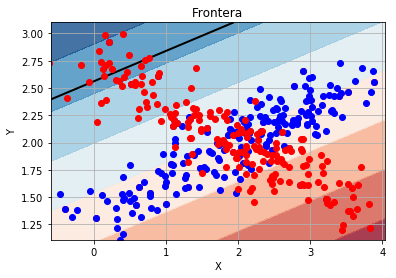

Error de scikit:
0.3871866295264624


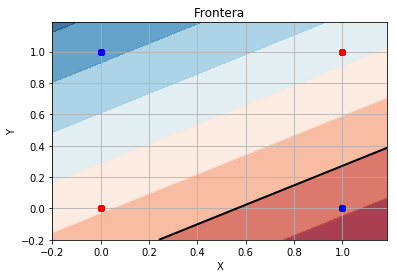

Error de scikit:
0.520891364902507


/srv/conda/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


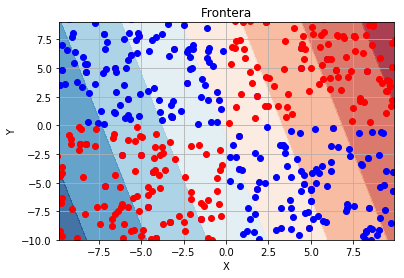

Error de scikit:
0.42896935933147634


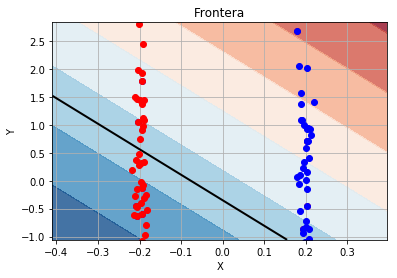

Error de scikit:
0.449438202247191


ValueError: X has 2 features per sample; expecting 30

<Figure size 432x288 with 0 Axes>

In [14]:
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
from sklearn.linear_model import LogisticRegression

datasets = ["example1.data","example2.data","example3.data","example4.data","wdbc.data"]
n_particiones = 1
for i in range(len(datasets)):
    dataset = Datos(datasets[i])

    particiones = ValidacionSimple(n_particiones,0.1,dataset).creaParticiones(dataset.datos)   

    datosTrain = dataset.extraeDatos(particiones[0].indicesTrain)
    datosTest = dataset.extraeDatos(particiones[0].indicesTest)
    cRLs = LogisticRegression(solver='lbfgs', max_iter=500) #solver por defecto, se puede usar sag para resulatdos mas parecidos
    cRLs.fit(datosTrain[:,:-1],datosTrain[:,-1])
    res = cRLs.predict(datosTest[:,:-1])
    error = Clasificador.error(datosTest,res)
    plt.figure()
    plotModel(dataset.datos[particiones[j].indicesTrain,0],dataset.datos[particiones[j].indicesTrain,1],
        dataset.datos[particiones[j].indicesTrain,-1] !=0, cRLs,"Frontera",dataset.diccionarios)
    plt.plot(dataset.datos[dataset.datos[:,-1]==0,0],  
     dataset.datos[dataset.datos[:,-1]==0,1],'bo')
    plt.plot(dataset.datos[dataset.datos[:,-1]==1,0],  
     dataset.datos[dataset.datos[:,-1]==1,1],'ro')
    plt.show()
    print("Error de scikit:"),
    print(error)



/srv/conda/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Error de scikit:
0.5125348189415042
Error de scikit:
0.5013927576601671
Error de scikit:
0.5598885793871866
Error de scikit:
0.0


ValueError: X has 2 features per sample; expecting 30

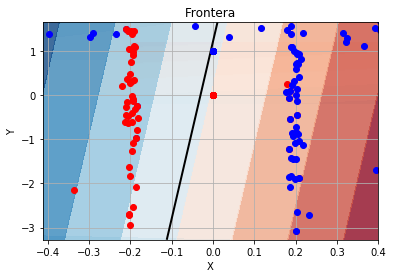

In [28]:
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *
from sklearn.linear_model import SGDClassifier

datasets = ["example1.data","example2.data","example3.data","example4.data","wdbc.data"]
n_particiones = 1
for i in range(len(datasets)):
    dataset = Datos(datasets[i])

    particiones = ValidacionSimple(n_particiones,0.1,dataset).creaParticiones(dataset.datos)   
    datosTrain = dataset.extraeDatos(particiones[0].indicesTrain)
    datosTest = dataset.extraeDatos(particiones[0].indicesTest)
    sgd = SGDClassifier(loss='log', max_iter=500, learning_rate='optimal') #regresion logistica, con 500 iteraciones. No hay equivalente para nuestra tasa de aprendizaje
    sgd.fit(datosTrain[:,:-1],datosTrain[:,-1])
    res = sgd.predict(datosTest[:,:-1])
    error = Clasificador.error(datosTest,res)
    plotModel(dataset.datos[particiones[j].indicesTrain,0],dataset.datos[particiones[j].indicesTrain,1],
        dataset.datos[particiones[j].indicesTrain,-1] !=0, sgd,"Frontera",dataset.diccionarios)
    plt.plot(dataset.datos[dataset.datos[:,-1]==0,0],  
     dataset.datos[dataset.datos[:,-1]==0,1],'bo')
    plt.plot(dataset.datos[dataset.datos[:,-1]==1,0],  
     dataset.datos[dataset.datos[:,-1]==1,1],'ro')
    print("Error de scikit:"),
    print(error)
